<a href="https://colab.research.google.com/github/Sun-ny-A/Hospital-Ratings/blob/main/National_Hospital_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hospital Ratings in the United States

Senait Abate

**Clean Data**

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, classification_report, \
ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
import folium
!pip install --upgrade plotly
import plotly.graph_objects as go
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


source of dataset: https://corgis-edu.github.io/corgis/csv/hospitals/

In [14]:
#upload data
df = pd.read_csv('/content/hospitals.csv')
df.head()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Marshall Medical Center South,Boaz,AL,Government,1.0,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
1,Mizell Memorial Hospital,Opp,AL,Private,1.0,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
2,Highlands Medical Center,Scottsboro,AL,Government,1.0,Same,Below,Below,Below,Same,...,Unknown,14855,Average,Lower,14509,Average,Lower,24701,Average,Higher
3,Mobile Infirmary Medical Center,Mobile,AL,Private,1.0,Same,Below,Below,Above,Same,...,Average,17664,Average,Higher,18321,Average,Higher,21994,Average,Average
4,Springhill Memorial Hospital,Mobile,AL,Proprietary,1.0,Same,Below,Below,Same,Same,...,Average,17150,Average,Average,17128,Average,Average,23520,Average,Higher


In [15]:
#check for duplicates
df.duplicated().sum()
#drop duplicates from data
df.drop_duplicates(inplace=True)

In [16]:
#no missing values
df.info()
#rating, quality, and value columns are ordinal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 3714
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Facility.Name                    3715 non-null   object 
 1   Facility.City                    3715 non-null   object 
 2   Facility.State                   3715 non-null   object 
 3   Facility.Type                    3715 non-null   object 
 4   Rating.Overall                   3715 non-null   float64
 5   Rating.Mortality                 3715 non-null   object 
 6   Rating.Safety                    3715 non-null   object 
 7   Rating.Readmission               3715 non-null   object 
 8   Rating.Experience                3715 non-null   object 
 9   Rating.Effectiveness             3715 non-null   object 
 10  Rating.Timeliness                3715 non-null   object 
 11  Rating.Imaging                   3715 non-null   object 
 12  Procedure.Heart Atta

In [17]:
#rename columns with spaces
df.rename(columns={'Procedure.Heart Attack.Cost':'Procedure.Heart.Attack.Cost'}, inplace=True)
df.rename(columns={'Procedure.Heart Attack.Quality':'Procedure.Heart.Attack.Quality'}, inplace=True)
df.rename(columns={'Procedure.Heart Attack.Value':'Procedure.Heart.Attack.Value'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Cost':'Procedure.Heart.Failure.Cost'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Quality':'Procedure.Heart.Failure.Quality'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Value':'Procedure.Heart.Failure.Value'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Cost':'Procedure.Hip.Knee.Cost'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Quality':'Procedure.Hip.Knee.Quality'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Value':'Procedure.Hip.Knee.Value'}, inplace=True)

In [18]:
df.nunique()
#all ordinal columns for quality and vaue have the four subtypes Above, Same, Below, or None/Unknown.

Facility.Name                      3570
Facility.City                      2363
Facility.State                       53
Facility.Type                         5
Rating.Overall                        5
Rating.Mortality                      4
Rating.Safety                         4
Rating.Readmission                    4
Rating.Experience                     4
Rating.Effectiveness                  4
Rating.Timeliness                     4
Rating.Imaging                        4
Procedure.Heart.Attack.Cost        1835
Procedure.Heart.Attack.Quality        4
Procedure.Heart.Attack.Value          4
Procedure.Heart.Failure.Cost       2413
Procedure.Heart.Failure.Quality       4
Procedure.Heart.Failure.Value         4
Procedure.Pneumonia.Cost           2728
Procedure.Pneumonia.Quality           4
Procedure.Pneumonia.Value             4
Procedure.Hip.Knee.Cost            2267
Procedure.Hip.Knee.Quality            4
Procedure.Hip.Knee.Value              4
dtype: int64

In [19]:
#drop columns
df.drop(['Facility.City', 'Facility.Name', 'Rating.Mortality', 'Rating.Safety', 'Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness', 'Rating.Imaging'], axis=1, inplace=True)
df.head()

,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
0,AL,Government,1.0,22579,Average,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
1,AL,Private,1.0,0,Unknown,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
2,AL,Government,1.0,0,Unknown,Unknown,14855,Average,Lower,14509,Average,Lower,24701,Average,Higher
3,AL,Private,1.0,22788,Average,Average,17664,Average,Higher,18321,Average,Higher,21994,Average,Average
4,AL,Proprietary,1.0,22208,Average,Average,17150,Average,Average,17128,Average,Average,23520,Average,Higher


In [20]:
df['Facility.State'].value_counts()
#double check VI

CA    296
TX    266
FL    169
IL    163
NY    150
PA    150
OH    146
MI    116
IN    110
GA    108
WI    108
NC     94
TN     91
MO     89
OK     85
IA     84
KY     82
LA     81
AL     79
VA     77
MN     76
KS     70
WA     68
MS     65
NJ     64
AR     62
CO     57
NE     57
MA     56
SC     55
AZ     55
OR     52
MD     45
WV     39
UT     34
ME     32
NM     30
CT     28
NV     27
NH     26
ID     25
MT     25
ND     20
SD     19
WY     18
HI     13
VT     12
AK     10
RI     10
DC      7
DE      6
PR      6
VI      2
Name: Facility.State, dtype: int64

In [21]:
#locate VI
df.loc[df['Facility.State'] == 'VI']
#looks like US territories are included in the state list, VI is Virgin Islands

,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
1024,VI,Government,2.0,20088,Average,Lower,13420,Average,Lower,13038,Average,Lower,17725,Average,Lower
2226,VI,Government,3.0,19583,Average,Lower,11716,Average,Lower,13192,Average,Lower,19770,Average,Lower


In [22]:
#Better, Average, Worse, or Unknown
df['Procedure.Heart.Attack.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Lower': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Attack.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Failure.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Failure.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Lower': 1, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Pneumonia.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Pneumonia.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Lower': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Hip.Knee.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Hip.Knee.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Lower': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)

In [23]:
#Kind of organization operating the hospital: one of Government, Private, Proprietary, Church, or Unknown
df['Facility.Type'].value_counts()

Private        1713
Government      672
Proprietary     627
Unknown         404
Church          299
Name: Facility.Type, dtype: int64

In [24]:
#Overall rating between 1 and 5 stars, with 5 stars being the highest rating; -1 represents no rating.
df['Rating.Overall'].value_counts()

3.0    1258
4.0    1087
2.0     797
5.0     292
1.0     281
Name: Rating.Overall, dtype: int64

In [25]:
#reviewing to confirm change
df['Procedure.Heart.Attack.Quality'].value_counts()

2    2185
0    1461
3      45
1      24
Name: Procedure.Heart.Attack.Quality, dtype: int64

In [26]:
df['Procedure.Heart.Attack.Value'].value_counts()

2    1868
0    1461
3     199
1     187
Name: Procedure.Heart.Attack.Value, dtype: int64

In [27]:
df['Procedure.Heart.Failure.Quality'].value_counts()

2    3031
0     354
3     196
1     134
Name: Procedure.Heart.Failure.Quality, dtype: int64

In [28]:
df['Procedure.Heart.Failure.Value'].value_counts()

2    2423
3     530
1     408
0     354
Name: Procedure.Heart.Failure.Value, dtype: int64

In [29]:
df['Procedure.Pneumonia.Quality'].value_counts()

2    3154
1     232
3     218
0     111
Name: Procedure.Pneumonia.Quality, dtype: int64

In [30]:
df['Procedure.Pneumonia.Value'].value_counts()

2    2078
1     785
3     741
0     111
Name: Procedure.Pneumonia.Value, dtype: int64

In [31]:
df['Procedure.Hip.Knee.Quality'].value_counts()

2    2527
0    1082
3      62
1      44
Name: Procedure.Hip.Knee.Quality, dtype: int64

In [32]:
df['Procedure.Hip.Knee.Value'].value_counts()

0    1082
2    1007
1     977
3     649
Name: Procedure.Hip.Knee.Value, dtype: int64

In [33]:
#add average heart attack procedure per state to data- adding for visuals
#source= https://stackoverflow.com/questions/69227651/add-a-column-with-mean-values-for-groups-based-on-another-column 
df = df.join(df.groupby('Facility.State')[['Procedure.Heart.Attack.Cost']]
             .transform('mean')
             .rename(columns='Mean.HAC.State'.format))

In [34]:
#add average cost of care for heart failure per state to data
df = df.join(df.groupby('Facility.State')[['Procedure.Heart.Failure.Cost']]
             .transform('mean')
             .rename(columns='Mean.HFC.State'.format))

In [35]:
#add average cost of care for pneumonia per state to data
df = df.join(df.groupby('Facility.State')[['Procedure.Pneumonia.Cost']]
             .transform('mean')
             .rename(columns='Mean.Pne.State'.format))

In [36]:
#add average cost of hip and knee procedures per state to data
df = df.join(df.groupby('Facility.State')[['Procedure.Hip.Knee.Cost']]
             .transform('mean')
             .rename(columns='Mean.HK.State'.format))

In [37]:
df.head()

,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value,Mean.HAC.State,Mean.HFC.State,Mean.Pne.State,Mean.HK.State
0,AL,Government,1.0,22579,2,2,15819,1,2,15614,1,1,22747,2,2,11610.202532,15131.860759,16264.227848,12110.0
1,AL,Private,1.0,0,0,0,14541,2,1,15226,1,1,23472,2,2,11610.202532,15131.860759,16264.227848,12110.0
2,AL,Government,1.0,0,0,0,14855,2,1,14509,2,1,24701,2,3,11610.202532,15131.860759,16264.227848,12110.0
3,AL,Private,1.0,22788,2,2,17664,2,3,18321,2,3,21994,2,2,11610.202532,15131.860759,16264.227848,12110.0
4,AL,Proprietary,1.0,22208,2,2,17150,2,2,17128,2,2,23520,2,3,11610.202532,15131.860759,16264.227848,12110.0


**Visualizations**

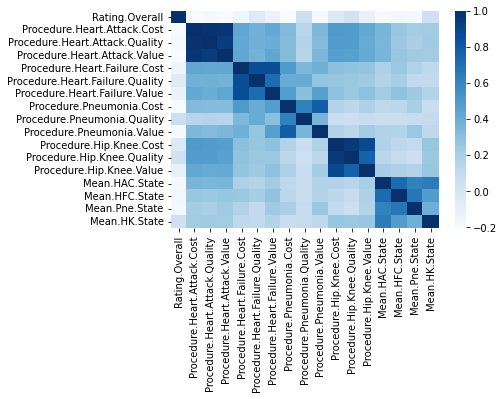

In [38]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues');

In the heat map, I took out annot=True to take out the correlation values as there are too many features and the values overlapped. 

The costs for all 4 procedures tend to be highly correlated with quality and value of that procedure. 

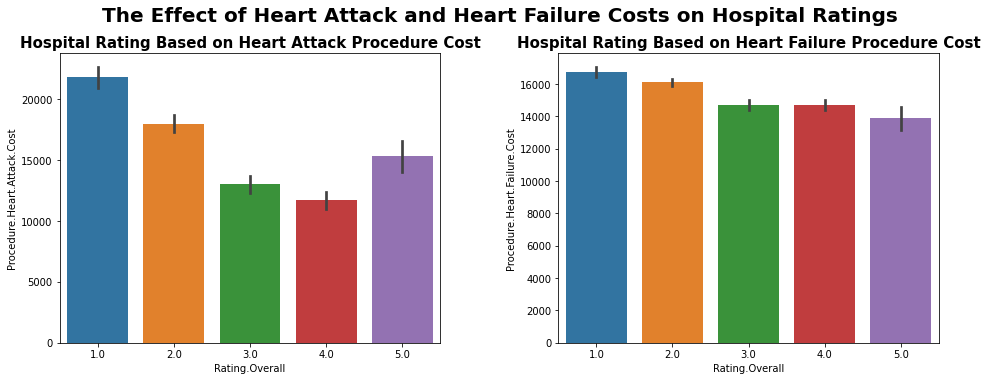

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Heart.Attack.Cost', ax=axes[0])
axes[0].set_title('Hospital Rating Based on Heart Attack Procedure Cost', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Heart.Failure.Cost', ax=axes[1])
axes[1].set_title('Hospital Rating Based on Heart Failure Procedure Cost', fontsize = 15, fontweight = 'bold')

fig.suptitle('The Effect of Heart Attack and Heart Failure Costs on Hospital Ratings', fontsize = 20, fontweight = 'bold', y=1.05)
fig.tight_layout()

Heart failure costs are slightly higher than heart attack costs at 4 and 3 rated hospitals. 

Heart attack costs are higher than heart failure costs at 1 rated hospitals. 

In general, heart failure and heart attack costs decrease the higher the hospital rating.

There is also much less variation in heart failure costs across all rated hospitals versus heart attack costs across all rated hospitals. 

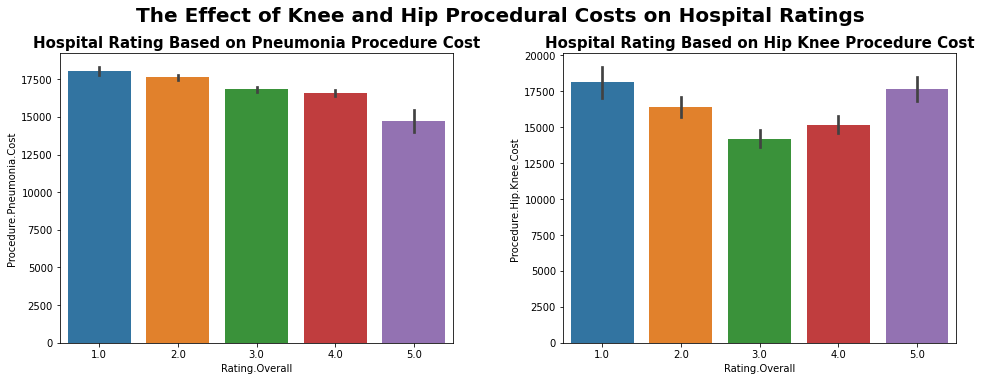

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Pneumonia.Cost', ax=axes[0])
axes[0].set_title('Hospital Rating Based on Pneumonia Procedure Cost', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Hip.Knee.Cost', ax=axes[1])
axes[1].set_title('Hospital Rating Based on Hip Knee Procedure Cost', fontsize = 15, fontweight = 'bold')

fig.suptitle('The Effect of Knee and Hip Procedural Costs on Hospital Ratings', fontsize = 20, fontweight = 'bold', y=1.05)
fig.tight_layout()

The trend in the above barplot shows the higher the hospital rating the lower the costs for pneumonia procedures while costs for hip and knee procedures fluctuate more with a average rating of 3 having the least cost.

In [80]:
#source= https://infopython.com/9-ways-to-plot-a-pie-chart-using-python/ 
values = df['Facility.Type'].value_counts()
labels = ['Private', 'Government', 'Proprietary', 'Unknown', 'Church']

circle_fig = go.Figure(data=[go.Pie(values=values, labels=labels, hole=0.3)])
circle_fig.update_layout(title_text='Percentage of Hospitals by Facility Type')
circle_fig.show()

print(values)

Private        1713
Government      672
Proprietary     627
Unknown         404
Church          299
Name: Facility.Type, dtype: int64


In [42]:
#choropleth maps of cost of care by state
#source= https://plotly.com/python/choropleth-maps/ 

fig = go.Figure(data=go.Choropleth(
    locations=df['Facility.State'],
    z = df['Mean.HAC.State'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Heart Attack Care in Dollars",
))

fig2 = go.Figure(data=go.Choropleth(
    locations=df['Facility.State'],
    z = df['Mean.HFC.State'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Heart Failure Care in Dollars",
))

fig3 = go.Figure(data=go.Choropleth(
    locations=df['Facility.State'],
    z = df['Mean.Pne.State'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Pneumonia Care in Dollars",
))

fig4 = go.Figure(data=go.Choropleth(
    locations=df['Facility.State'],
    z = df['Mean.HK.State'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Hip and Knee Care in Dollars",
))

fig.update_layout(
    title_text = 'Average Cost of Heart Attack Care by State',
    geo_scope='usa',
)

fig2.update_layout(
    title_text = 'Average Cost of Heart Failure Care by State',
    geo_scope='usa',
)

fig3.update_layout(
    title_text = 'Average Cost of Pneumonia Care by State',
    geo_scope='usa',
)

fig4.update_layout(
    title_text = 'Average Cost of Hip and Knee Care by State',
    geo_scope='usa',
)

fig.show()
fig2.show()
fig3.show()
fig4.show()

**Modeling**

In [43]:
df2 = df.copy()
df2.duplicated().sum()
#drop duplicates from data
df2.drop_duplicates(inplace=True)

In [44]:
#drop mean columns that's not needed for modeling
df2.drop(['Mean.HAC.State', 'Mean.HFC.State', 'Mean.Pne.State', 'Mean.HK.State'], axis=1, inplace=True)
df2.head()

,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
0,AL,Government,1.0,22579,2,2,15819,1,2,15614,1,1,22747,2,2
1,AL,Private,1.0,0,0,0,14541,2,1,15226,1,1,23472,2,2
2,AL,Government,1.0,0,0,0,14855,2,1,14509,2,1,24701,2,3
3,AL,Private,1.0,22788,2,2,17664,2,3,18321,2,3,21994,2,2
4,AL,Proprietary,1.0,22208,2,2,17150,2,2,17128,2,2,23520,2,3


In [45]:
#df3 for deep learning model
df3 = df2.copy()

In [46]:
df3.head()

,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
0,AL,Government,1.0,22579,2,2,15819,1,2,15614,1,1,22747,2,2
1,AL,Private,1.0,0,0,0,14541,2,1,15226,1,1,23472,2,2
2,AL,Government,1.0,0,0,0,14855,2,1,14509,2,1,24701,2,3
3,AL,Private,1.0,22788,2,2,17664,2,3,18321,2,3,21994,2,2
4,AL,Proprietary,1.0,22208,2,2,17150,2,2,17128,2,2,23520,2,3


Preprocessing

In [47]:
#assign X and y
#Rating.Overall is the target

X = df2.drop(columns='Rating.Overall')
y = df2['Rating.Overall']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

#create tuples
ohe_tuple = (ohe, cat_selector)
scaler_tuple = (scaler, num_selector)

# let the numeric columns pass through unchanged
preprocessor = make_column_transformer(ohe_tuple, scaler_tuple, remainder = 'passthrough')


KNN Model

In [49]:
knn= KNeighborsClassifier()

#create a pipeline for KNN model
knn_pipe = make_pipeline(preprocessor, knn)
#fit model to dataset
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0544993390>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0544993c10>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [50]:
#predict Rating.Overall
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [51]:
#evaluate KNN model

#accuracy
print('Accuracy of Train set', accuracy_score(y_train, knn_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, knn_test_preds))

Accuracy of Train set 0.5612833453496756
Accuracy of Test set 0.3567567567567568


Accuracy of KNN model is 35% on the test set and 56% on the train set

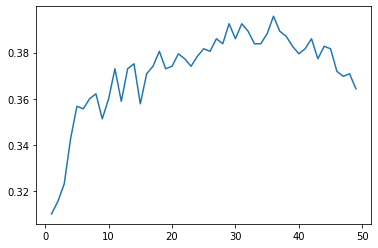

Best K value is 36 
with 0.3956756756756757 accuracy on the test set


In [79]:
#find best K value
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

Best K value at 36 improved model with 40% accuracy on the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



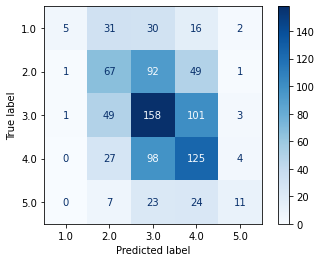

In [80]:
#KNN model with best k and confusion matrix

#create and fit pipeline for model
knn_final_pipe = make_pipeline(preprocessor, 
                               KNeighborsClassifier(n_neighbors = bestk))
knn_final_pipe.fit(X_train, y_train)

#confusion matrix for KNN with best k
plot_confusion_matrix(knn_final_pipe, X_test, y_test, cmap = 'Blues', values_format = 'd');

In [81]:
#prediction time
knn_final_pred = knn_final_pipe.predict(X_test)

In [82]:
#recall score
print(metrics.recall_score(y_test.values, knn_final_pred, average='micro'))
#recall score shows that model correctly predicts the hospital rating 40% of the time. High recall score reduces chance of type 2 errors (false negatives)- reduces chance of model incorrectly predicting a certain rating

0.3956756756756757


In [83]:
#precision score
print(metrics.precision_score(y_test.values, knn_final_pred, average='micro'))
#precision score of 40%. High precision score reduces type 1 errors (false positive) -reduces chance of model incorrectly rejecting a certain rating

0.3956756756756757


Based on the confusion matrix, the KNN model with best K 36 can predict hospital ratings of 3 and 4 pretty well, has about an average predictability for 2 rated hospitals but does not do well with 1 and 5 rated hospitals. 

PCA with KNN Model

In [62]:
knn2 = KNeighborsClassifier()
pca = PCA()

In [63]:
#create a transformer pipeline
transformer = make_pipeline(preprocessor, pca)

In [64]:
#create a modeling pipeline with pca
knn2_pca_pipe = make_pipeline(transformer, knn2)
knn2_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5632681e50>),
                                                                  ('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f5632681f10>)])),
                                 ('pca', PCA())])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [65]:
#predict Rating.Overall
knn2_pca_train_preds = knn2_pca_pipe.predict(X_train)
knn2_pca_test_preds = knn2_pca_pipe.predict(X_test)

#accuracy
print('Accuracy of Train set', accuracy_score(y_train, knn2_pca_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, knn2_pca_test_preds))

Accuracy of Train set 0.5612833453496756
Accuracy of Test set 0.35783783783783785


PCA did not improve the KNN model.

In [84]:
#KNN model with GridSearchCV

#define new KNN model for GridSearchCV
knn3 = KNeighborsClassifier()
#create a modeling pipeline
knn3_pipe = make_pipeline(preprocessor, knn3)

In [85]:
#review parameters
knn3_pipe.get_params()


{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f56324282d0>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5632428250>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': False,
 'columntransformer__remainde

In [86]:
#set parameters
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,40),
              'kneighborsclassifier__weights': ['balanced','uniform']}

In [87]:
knn3_pipe_gs = GridSearchCV(knn3_pipe, param_grid)
 
knn3_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn3_pipe_gs.best_params_)
best_pipe = knn3_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1755 fits failed out of a total of 3510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1755 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/usr/

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.36864864864864866


Random Forest Regressor

In [88]:
#instantiate model
rf = RandomForestRegressor(random_state = 42)
#review hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [89]:
#instanstiate model
rf_pipe = make_pipeline(preprocessor, rf)
#train model
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f56324282d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5632428250>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [90]:
#predict values for y
rf_pipe.predict(X_test)

array([2.97      , 2.7       , 3.09      , 4.67      , 2.61      ,
       3.11      , 3.23      , 2.55      , 3.59      , 3.08      ,
       2.70916667, 2.86      , 2.22      , 2.52      , 2.75      ,
       2.96      , 3.24      , 2.23      , 3.76      , 2.97      ,
       3.45      , 3.09      , 3.16      , 2.45      , 3.28      ,
       3.25      , 2.9       , 3.57      , 2.96      , 1.87      ,
       3.41      , 3.11      , 3.03      , 1.48      , 3.95      ,
       2.74      , 2.35      , 3.92      , 3.12      , 3.03      ,
       2.88      , 3.29      , 2.6       , 2.71      , 3.38      ,
       2.08      , 3.66      , 2.76      , 3.1       , 3.55      ,
       3.04      , 3.00583333, 3.22      , 3.63      , 3.73      ,
       4.22      , 2.91      , 3.36      , 3.51      , 2.39      ,
       3.52      , 3.41      , 2.79      , 3.28      , 2.92      ,
       3.44      , 3.38      , 2.59      , 4.06      , 1.33      ,
       3.37      , 2.51      , 2.67      , 3.05      , 1.77   

In [91]:
#evaluate random forest model performance
rf_pipe_train_score = rf_pipe.score(X_train, y_train)
rf_pipe_test_score = rf_pipe.score(X_test, y_test)
print(rf_pipe_train_score)
print(rf_pipe_test_score)

0.883668740246947
0.2043433955101165


R2 value of about 88% for training set and 20% for test set. This shows very high overfitting. Will tune random forest model to see if model can be improved.

In [92]:
#depth of model with unlimited max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

53

In [93]:
#use loop to loop to find best max_depth
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model_pipe = make_pipeline(preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model_pipe.score(X_test, y_test)
   scores.head()

In [94]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

# best test score at the top

,Test Score,Train Score
9,0.220706,0.446578
13,0.218688,0.608842
15,0.216476,0.681357
11,0.216159,0.535970
10,0.215253,0.489010


In [95]:
#tune model using n_estimators instead

n_ests = [2, 10, 20, 30, 40, 55]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model2 = RandomForestRegressor(max_depth=53, n_estimators=n)
   model2_pipe = make_pipeline(preprocessor, model)
   model2_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model2_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model2_pipe.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
2,0.198274,0.884682
10,0.208601,0.885657
20,0.201837,0.884746
30,0.188417,0.887299
40,0.210746,0.884804


**Deep Learning Model**

In [52]:
#assign X and y
#Rating.Overall is the target

X = df3.drop(columns='Rating.Overall')
y = df3['Rating.Overall']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
# process the data
preprocessor.fit(X_train, y_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_proc.shape

(2774, 70)

In [54]:
#define features
input_shape = X_train_proc.shape[1]
input_shape

70

In [55]:
#define model
reg_model = Sequential()

In [56]:
#sequential model in keras

#first layer
reg_model.add(Dense(70, input_dim = input_shape, activation='relu'))
#second layer
reg_model.add(Dense(50, activation='relu'))
#second layer
reg_model.add(Dense(30, activation='relu'))
#second layer
reg_model.add(Dense(10, activation='relu'))
#second layer
reg_model.add(Dense(5, activation='relu'))
#outer layer
reg_model.add(Dense(1, activation='linear'))

#summary
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                4970      
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 10,421
Trainable params: 10,421
Non-traina

In [57]:
#compile classification model- mse loss function and adam optimizer
reg_model.compile(loss = 'mse', optimizer = 'adam', metrics = 'mae')

#fit model
history = reg_model.fit(X_train_proc, y_train, validation_data = (X_test_proc, y_test), epochs=60, verbose=0)

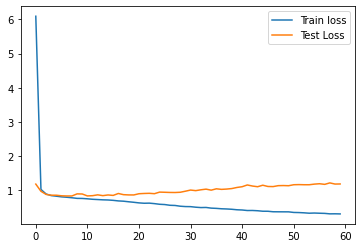

In [58]:
#visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Upward trend of test loss shows overfitting. Will try to tune model with dropout.

In [59]:
#sequential model with dropout

#define model
reg_model2 = Sequential()

In [60]:
#sequential model with dropout

#first layer
reg_model2.add(Dense(70, input_dim = input_shape, activation='relu'))
reg_model2.add(Dropout(.2))
#second layer
reg_model2.add(Dense(50, activation='relu'))
reg_model2.add(Dropout(.2))
#third layer
reg_model2.add(Dense(30, activation='relu'))
reg_model2.add(Dropout(.2))
#fourth layer
reg_model2.add(Dense(10, activation='relu'))
reg_model2.add(Dropout(.2))
#fifth layer
reg_model2.add(Dense(5, activation='relu'))
reg_model2.add(Dropout(.2))
#outer layer
reg_model2.add(Dense(1, activation='linear'))

#summary
reg_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 70)                4970      
                                                                 
 dropout (Dropout)           (None, 70)                0         
                                                                 
 dense_7 (Dense)             (None, 50)                3550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 30)                1530      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [68]:
#compile classification model- mse loss function and adam optimizer
reg_model2.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae', 'accuracy'])

#fit model
history2 = reg_model2.fit(X_train_proc, y_train, validation_data = (X_test_proc, y_test), epochs=60, verbose=0)

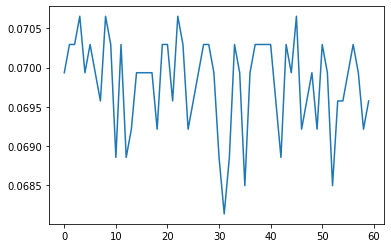

In [70]:
pyplot.plot(history2.history['accuracy'])
pyplot.show()

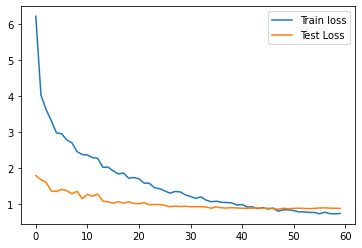

In [62]:
#visualize the loss
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();

dropout helped sequential model be much less overfit but with low accuracy